## Importing Libraries and Dataset Overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")

In [4]:
df

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,181689,201712310031,2017,12,31,NaN,0,NaN,92,India,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
# success - Success of a terrorist strike
# suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide
# attacktype1 - The general method of attack
# attacktype1_txt - The general method of attack and broad class of tactics used.
# targtype1_txt - The general type of target/victim
# targsubtype1_txt - The more specific target category
# target1 - The specific person, building, installation that was targeted and/or victimized
# natlty1_txt - The nationality of the target that was attacked
# gname - The name of the group that carried out the attack
# gsubname - Additional details about group that carried out the attack like fractions
# nperps - The total number of terrorists participating in the incident
# weaptype1_txt - General type of weapon used in the incident
# weapsubtype1_txt - More specific value for most of the Weapon Types
# nkill - The number of total confirmed fatalities for the incident
# nkillus - The number of U.S. citizens who died as a result of the incident

## Data Cleaning

#### Dropping null columns

In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

#### Creating subset of important columns

In [8]:
imp_features=df[['iyear','imonth','iday','country','country_txt','success','suicide','attacktype1','attacktype1_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','gname','nperps','weaptype1_txt','weapsubtype1_txt','nkill','nkillus']]
imp_features

,iyear,imonth,iday,country,country_txt,success,suicide,attacktype1,attacktype1_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,gname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus
0,1970,7,2,58,Dominican Republic,1,0,1,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,NaN,Unknown,NaN,1.0,NaN
1,1970,0,0,130,Mexico,1,0,6,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,7.0,Unknown,NaN,0.0,NaN
2,1970,1,0,160,Philippines,1,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,NaN,Unknown,NaN,1.0,NaN
3,1970,1,0,78,Greece,1,0,3,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,Explosives,Unknown Explosive Type,NaN,NaN
4,1970,1,0,101,Japan,1,0,7,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,182,Somalia,1,0,2,Armed Assault,Military,Military Checkpoint,Somalia,Al-Shabaab,-99.0,Firearms,Unknown Gun Type,1.0,0.0
181687,2017,12,31,200,Syria,1,0,3,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Russia,Muslim extremists,-99.0,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",2.0,0.0
181688,2017,12,31,160,Philippines,1,0,7,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,Incendiary,Arson/Fire,0.0,0.0
181689,2017,12,31,92,India,0,0,3,Bombing/Explosion,Government (General),Government Building/Facility/Office,India,Unknown,-99.0,Explosives,Grenade,0.0,0.0


In [9]:
imp_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   country           181691 non-null  int64  
 4   country_txt       181691 non-null  object 
 5   success           181691 non-null  int64  
 6   suicide           181691 non-null  int64  
 7   attacktype1       181691 non-null  int64  
 8   attacktype1_txt   181691 non-null  object 
 9   targtype1_txt     181691 non-null  object 
 10  targsubtype1_txt  171318 non-null  object 
 11  natlty1_txt       180132 non-null  object 
 12  gname             181691 non-null  object 
 13  nperps            110576 non-null  float64
 14  weaptype1_txt     181691 non-null  object 
 15  weapsubtype1_txt  160923 non-null  object 
 16  nkill             17

In [10]:
imp_features.describe()

,iyear,imonth,iday,country,success,suicide,attacktype1,nperps,nkill,nkillus
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,110576.000000,171378.000000,117245.000000
mean,2002.638997,6.467277,15.505644,131.968501,0.889598,0.036507,3.247547,-65.361154,2.403272,0.045981
std,13.259430,3.388303,8.814045,112.414535,0.313391,0.187549,1.915772,216.536633,11.545741,5.681854
min,1970.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,-99.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,78.000000,1.000000,0.000000,2.000000,-99.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,98.000000,1.000000,0.000000,3.000000,-99.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,160.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000
max,2017.000000,12.000000,31.000000,1004.000000,1.000000,1.000000,9.000000,25000.000000,1570.000000,1360.000000


## Exploratory Data Analysis and Cleaning

#### Creating "date" column from year, month and day

In [16]:
imp_features['date'] = pd.to_datetime(
    imp_features[['iyear', 'imonth', 'iday']].rename(columns={
        'iyear': 'year',
        'imonth': 'month',
        'iday': 'day'
    }),
    errors='coerce'  # this avoids crashing on invalid dates
)

In [37]:
imp_features = imp_features.reset_index(drop=True)
dropcols=['iyear','imonth','iday']
imp_features=imp_features.drop(dropcols,axis=1)

#### Imputing null values with mode values

In [12]:
imp_features['targsubtype1_txt'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
181686    False
181687    False
181688    False
181689    False
181690     True
Name: targsubtype1_txt, Length: 181691, dtype: bool

In [13]:
mode_val=df['targsubtype1_txt'].mode()[0]
mode_val

'Unnamed Civilian/Unspecified'

In [14]:
imp_features['targsubtype1_txt'].fillna(mode_val, inplace=True)


In [17]:
imp_features['natlty1_txt'].isnull().sum()

1559

In [18]:
imp_features['natlty1_txt'].fillna("Unknown",inplace=True)

In [19]:
imp_features['nperps'].value_counts()

nperps
-99.0      82218
 1.0        8384
 2.0        6062
 3.0        2842
 4.0        2218
           ...  
 370.0         1
 56.0          1
 900.0         1
 3200.0        1
 750.0         1
Name: count, Length: 113, dtype: int64

In [20]:
imp_features['nperps']=imp_features['nperps'].replace({-99.0:0.0})

In [21]:
modeval=imp_features['nperps'].mode()[0]
imp_features['nperps'].fillna(modeval,inplace=True)

In [22]:
imp_features['weapsubtype1_txt'].fillna('Unknown Weapon Type',inplace=True)

In [23]:
modevals=imp_features['nkill'].mode()[0]
imp_features['nkill'].fillna(modevals,inplace=True)

In [24]:
modevals

0.0

In [25]:
imp_features['nkill'].isnull().sum()

0

In [26]:
modevals=imp_features['nkillus'].mode()[0]
imp_features['nkillus'].fillna(modevals,inplace=True)

In [27]:
df['attacktype1_txt'].value_counts()

attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

In [28]:
imp_features['attacktype1_txt']=imp_features['attacktype1_txt'].replace({'Hostage Taking (Kidnapping)':'Hostage Taking','Hostage Taking (Barricade Incident)':'Hostage Taking'})

## Preliminary Data Visualization

<AxesSubplot:xlabel='attacktype1_txt', ylabel='count'>

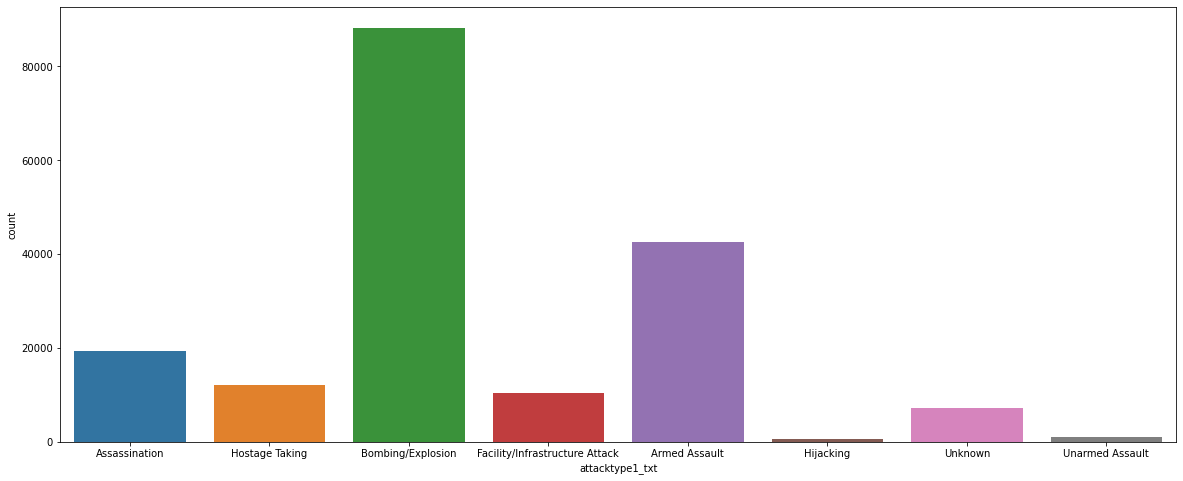

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(data=imp_features
              , x='attacktype1_txt')

<AxesSubplot:xlabel='success', ylabel='count'>

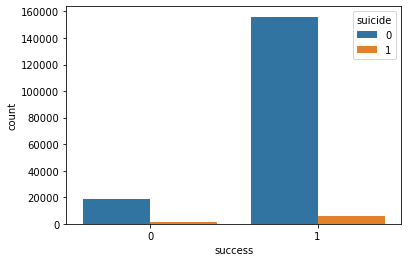

In [30]:
sns.countplot(imp_features['success'], hue=imp_features['suicide'])

<AxesSubplot:xlabel='iyear', ylabel='success'>

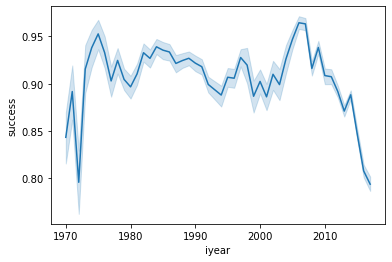

In [31]:
sns.lineplot(df['iyear'],imp_features['success'])

<AxesSubplot:xlabel='country_txt', ylabel='count'>

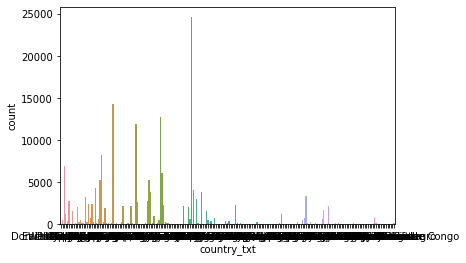

In [32]:
sns.countplot(imp_features['country_txt'])

In [33]:
imp_features['country_txt'].value_counts()

country_txt
Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: count, Length: 205, dtype: int64

### Cleaned Dataset

In [34]:
imp_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   iyear             181691 non-null  int64         
 1   imonth            181691 non-null  int64         
 2   iday              181691 non-null  int64         
 3   country           181691 non-null  int64         
 4   country_txt       181691 non-null  object        
 5   success           181691 non-null  int64         
 6   suicide           181691 non-null  int64         
 7   attacktype1       181691 non-null  int64         
 8   attacktype1_txt   181691 non-null  object        
 9   targtype1_txt     181691 non-null  object        
 10  targsubtype1_txt  181691 non-null  object        
 11  natlty1_txt       181691 non-null  object        
 12  gname             181691 non-null  object        
 13  nperps            181691 non-null  float64       
 14  weap

### Preparing Dataset for Modelling

In [35]:
imp_features['nperps']=imp_features['nperps'].astype('int64')
imp_features['nkill']=imp_features['nkill'].astype('int64')
imp_features['nkillus']=imp_features['nkillus'].astype('int64')

In [36]:
imp_features

,iyear,imonth,iday,country,country_txt,success,suicide,attacktype1,attacktype1_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,gname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,date
0,1970,7,2,58,Dominican Republic,1,0,1,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,0,Unknown,Unknown Weapon Type,1,0,1970-07-02
1,1970,0,0,130,Mexico,1,0,6,Hostage Taking,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,7,Unknown,Unknown Weapon Type,0,0,NaT
2,1970,1,0,160,Philippines,1,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,0,Unknown,Unknown Weapon Type,1,0,NaT
3,1970,1,0,78,Greece,1,0,3,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,0,Explosives,Unknown Explosive Type,0,0,NaT
4,1970,1,0,101,Japan,1,0,7,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,0,Incendiary,Unknown Weapon Type,0,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,182,Somalia,1,0,2,Armed Assault,Military,Military Checkpoint,Somalia,Al-Shabaab,0,Firearms,Unknown Gun Type,1,0,2017-12-31
181687,2017,12,31,200,Syria,1,0,3,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Russia,Muslim extremists,0,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",2,0,2017-12-31
181688,2017,12,31,160,Philippines,1,0,7,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0,Incendiary,Arson/Fire,0,0,2017-12-31
181689,2017,12,31,92,India,0,0,3,Bombing/Explosion,Government (General),Government Building/Facility/Office,India,Unknown,0,Explosives,Grenade,0,0,2017-12-31


In [38]:
imp_features_num=imp_features[['country',
 'success',
 'suicide',
 'attacktype1',
 'nperps',
 'nkill',
 'nkillus',
 'date']]

<AxesSubplot:>

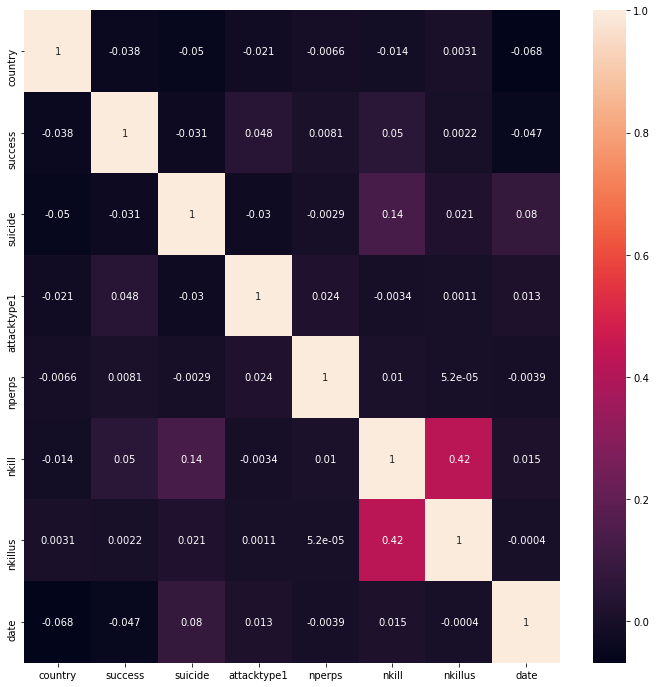

In [39]:
cor=imp_features_num.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor, annot=True)

### Weak correlations. Success of attempt is most dependant on number of fatalities and attack type

In [40]:
cat_feat=(imp_features.dtypes=="object")
categ_cols = list(cat_feat[cat_feat].index)
print(categ_cols)

['country_txt', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt']


In [41]:
num_feat=(imp_features.dtypes!="object")
num_cols=list(num_feat[num_feat].index)
num_cols

['country',
 'success',
 'suicide',
 'attacktype1',
 'nperps',
 'nkill',
 'nkillus',
 'date']

## Data Modelling

In [42]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [43]:
num_scaling=['country',
 'suicide',
 'attacktype1',
 'nperps',
 'nkill',
 'nkillus']

In [44]:
imp_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   country           181691 non-null  int64         
 1   country_txt       181691 non-null  object        
 2   success           181691 non-null  int64         
 3   suicide           181691 non-null  int64         
 4   attacktype1       181691 non-null  int64         
 5   attacktype1_txt   181691 non-null  object        
 6   targtype1_txt     181691 non-null  object        
 7   targsubtype1_txt  181691 non-null  object        
 8   natlty1_txt       181691 non-null  object        
 9   gname             181691 non-null  object        
 10  nperps            181691 non-null  int64         
 11  weaptype1_txt     181691 non-null  object        
 12  weapsubtype1_txt  181691 non-null  object        
 13  nkill             181691 non-null  int64         
 14  nkil

In [45]:

imp_features_model=imp_features.drop('date', axis=1)
imp_features_model

,country,country_txt,success,suicide,attacktype1,attacktype1_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,gname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus
0,58,Dominican Republic,1,0,1,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,0,Unknown,Unknown Weapon Type,1,0
1,130,Mexico,1,0,6,Hostage Taking,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,7,Unknown,Unknown Weapon Type,0,0
2,160,Philippines,1,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,0,Unknown,Unknown Weapon Type,1,0
3,78,Greece,1,0,3,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,0,Explosives,Unknown Explosive Type,0,0
4,101,Japan,1,0,7,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,0,Incendiary,Unknown Weapon Type,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,182,Somalia,1,0,2,Armed Assault,Military,Military Checkpoint,Somalia,Al-Shabaab,0,Firearms,Unknown Gun Type,1,0
181687,200,Syria,1,0,3,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Russia,Muslim extremists,0,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",2,0
181688,160,Philippines,1,0,7,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0,Incendiary,Arson/Fire,0,0
181689,92,India,0,0,3,Bombing/Explosion,Government (General),Government Building/Facility/Office,India,Unknown,0,Explosives,Grenade,0,0


In [46]:
X=imp_features_model.drop(['success'],axis=1)
y=imp_features_model['success']

In [47]:
num_cols_final = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols_final = X.select_dtypes(include=['object', 'category']).columns.tolist()


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [49]:
scaler=StandardScaler()
ohe=OneHotEncoder()

In [50]:
preprocessor=ColumnTransformer([
    ('num',StandardScaler(),num_cols_final),
    ('cat',OneHotEncoder(handle_unknown='ignore'),cat_cols_final)
])

In [51]:
imp_features.to_csv("terrorism.csv")

In [53]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])



In [84]:
# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [85]:
X_train

,country,country_txt,suicide,attacktype1,attacktype1_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,gname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus
110330,209,Turkey,0,2,Armed Assault,Police,Police Security Forces/Officers,Turkey,Kurdistan Workers' Party (PKK),0,Firearms,Rifle/Shotgun (non-automatic),1,0
36400,92,India,0,1,Assassination,Violent Political Party,Party Official/Candidate/Other Personnel,India,Unknown,0,Firearms,Automatic or Semi-Automatic Rifle,2,0
48600,209,Turkey,0,3,Bombing/Explosion,Business,Bank/Commerce,Turkey,Unknown,0,Explosives,Unknown Explosive Type,0,0
535,209,Turkey,0,3,Bombing/Explosion,Business,Unnamed Civilian/Unspecified,United States,Turkish People's Liberation Army,0,Explosives,Unknown Explosive Type,0,0
4947,49,Costa Rica,0,3,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,El Salvador,Unknown,0,Explosives,Unknown Explosive Type,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,92,India,0,3,Bombing/Explosion,Police,"Police Building (headquarters, station, school)",India,Maoists,200,Explosives,Remote Trigger,0,0
103694,182,Somalia,0,6,Hostage Taking,Business,Unnamed Civilian/Unspecified,Somalia,Al-Shabaab,0,Unknown,Unknown Weapon Type,0,0
131932,95,Iraq,0,2,Armed Assault,Terrorists/Non-State Militia,Non-State Militia,Iraq,Unknown,0,Firearms,Unknown Gun Type,3,0
146867,205,Thailand,0,2,Armed Assault,Police,Police Security Forces/Officers,Thailand,Unknown,2,Firearms,Automatic or Semi-Automatic Rifle,1,0


### Random Forest Regressor

In [55]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['country', 'suicide',
                                                   'attacktype1', 'nperps',
                                                   'nkill', 'nkillus']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country_txt',
                                                   'attacktype1_txt',
                                                   'targtype1_txt',
                                                   'targsubtype1_txt',
                                                   'natlty1_txt', 'gname',
                                                   'weaptype1_txt',
                                                   'weapsubtype1_txt'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [56]:
y_pred = pipeline.predict(X_test)


In [57]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(results.head(10)) 

        Actual  Predicted
83552        1   1.000000
30191        1   1.000000
51303        1   0.050000
73581        1   1.000000
17703        0   0.020000
174077       1   1.000000
132395       1   1.000000
12791        1   1.000000
154258       0   0.076443
28720        1   1.000000


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [69]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)

In [66]:
print("Root mean squared error: ",np.sqrt(mse))

Root mean squared error:  0.25003610537130816


In [67]:
print("Mean absolute error: ",mae)

Mean absolute error:  0.10306833120746171


In [70]:
print("R2 score: ",r2_score)

R2 score:  0.36257930535962957


#### RandomForestRegressor doesn't perform well

### Catboost Model

In [71]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error
print("Baseline R² :", r2_score(y_test, y_dummy))
print("Baseline MAE:", mean_absolute_error(y_test, y_dummy))


Baseline R² : -5.314218440855001e-07
Baseline MAE: 0.19633744384957696


In [73]:
!pip install catboost

In [74]:
from catboost import CatBoostRegressor

cat_cols = X.select_dtypes(include='object').columns.tolist()

model = CatBoostRegressor(verbose=0)
model.fit(X_train, y_train, cat_features=cat_cols)

In [77]:
y_pred_cat=model.predict(X_test)

In [79]:
mse_cat=mean_squared_error(y_test,y_pred_cat)
mae_cat=mean_absolute_error(y_test,y_pred_cat)
r2_score_cat=r2_score(y_test,y_pred_cat)

In [80]:
print("Root mean squared error: ",np.sqrt(mse_cat))
print("Mean absolute error: ",mae_cat)
print("R2 score: ",r2_score_cat)

Root mean squared error:  0.2386041907960702
Mean absolute error:  0.11893113947606065
R2 score:  0.4195339251776754


#### Even Catboost doesn't perform well

## Compare multiple models for better fit

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
models={"LogReg":LogisticRegression(),
        "RF":RandomForestClassifier(),
        "GBC":GradientBoostingClassifier(),
        "DT":DecisionTreeClassifier(),
        "ADA":AdaBoostClassifier()
       }

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score,
    recall_score, roc_auc_score
)
from sklearn.model_selection import train_test_split

X=imp_features_model.drop(['success'],axis=1)
y=imp_features_model['success']

# 2. Identify column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 4. Evaluate each model
for name, model in models.items():
    # Preprocessing for numeric + categorical
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Train metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_rocauc = roc_auc_score(y_train, pipeline.predict_proba(X_train), multi_class='ovr') if len(set(y)) > 2 else roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1])

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_rocauc = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr') if len(set(y)) > 2 else roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

    # Print results
    print(f"\n🧠 Model: {name}")
    print("Training performance:")
    print(f"- Accuracy:  {train_accuracy:.4f}")
    print(f"- F1 Score:  {train_f1:.4f}")
    print(f"- Precision: {train_precision:.4f}")
    print(f"- Recall:    {train_recall:.4f}")
    print(f"- ROC AUC:   {train_rocauc:.4f}")

    print("\nTest performance:")
    print(f"- Accuracy:  {test_accuracy:.4f}")
    print(f"- F1 Score:  {test_f1:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall:    {test_recall:.4f}")
    print(f"- ROC AUC:   {test_rocauc:.4f}")
    print("--------------------------------------------------")



🧠 Model: LogReg
Training performance:
- Accuracy:  0.9085
- F1 Score:  0.8901
- Precision: 0.8953
- Recall:    0.9085
- ROC AUC:   0.8373

Test performance:
- Accuracy:  0.9094
- F1 Score:  0.8915
- Precision: 0.8966
- Recall:    0.9094
- ROC AUC:   0.8322
--------------------------------------------------

🧠 Model: RF
Training performance:
- Accuracy:  0.9684
- F1 Score:  0.9673
- Precision: 0.9674
- Recall:    0.9684
- ROC AUC:   0.9884

Test performance:
- Accuracy:  0.9230
- F1 Score:  0.9159
- Precision: 0.9152
- Recall:    0.9230
- ROC AUC:   0.8859
--------------------------------------------------

🧠 Model: GBC
Training performance:
- Accuracy:  0.9222
- F1 Score:  0.9089
- Precision: 0.9159
- Recall:    0.9222
- ROC AUC:   0.8680

Test performance:
- Accuracy:  0.9232
- F1 Score:  0.9104
- Precision: 0.9173
- Recall:    0.9232
- ROC AUC:   0.8721
--------------------------------------------------

🧠 Model: DT
Training performance:
- Accuracy:  0.9684
- F1 Score:  0.9681
- Pre

### Gradient Boosting Classifer performs the best